In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('whitegrid')

In [6]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2017-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
 5   RF      96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [7]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.158438,0.060417,-0.049792,0.128750,0.047917,0.012604
std,3.580012,2.302008,2.202941,1.581701,1.411604,0.022583
min,-7.890000,-4.550000,-4.700000,-3.880000,-3.250000,0.000000
25%,-0.917500,-1.695000,-1.662500,-1.090000,-0.952500,0.000000
50%,1.235000,0.205000,-0.310000,0.190000,-0.005000,0.000000
75%,3.197500,1.590000,1.205000,1.197500,0.922500,0.010000
max,11.350000,7.070000,8.210000,3.480000,3.700000,0.090000


In [8]:
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2017-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


In [10]:
with pd.HDFStore('../data/assets.h5') as store:
    prices = store['/quandl/wiki/prices'].adj_close.unstack().loc['2010':'2017']
    equities = store['/us_equities/stocks'].drop_duplicates()

In [23]:
sectors = equities.filter(prices.columns, axis = 0).sector.to_dict()
prices = prices.filter(sectors.keys()).dropna(how='all', axis = 1)

In [25]:
returns = prices.resample('M').last().pct_change().mul(100).to_period('M')
returns = returns.dropna(how='all').dropna(axis=1)
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Columns: 1986 entries, A to ZUMZ
dtypes: float64(1986)
memory usage: 1.4 MB


In [27]:
ff_factor_data = ff_factor_data.loc[returns.index]
ff_portfolio_data = ff_portfolio_data.loc[returns.index]

# Compute excess return

In [34]:
excess_returns = returns.sub(ff_factor_data.RF, axis = 0)
excess_returns.describe()

,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,...,YRCW,YUM,ZAGG,ZBH,ZBRA,ZEUS,ZION,ZIOP,ZIXI,ZUMZ
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,1.585400,2.645319,1.531491,2.284955,1.284023,2.277434,1.196717,1.160586,1.586976,2.090808,...,0.104390,1.587857,3.994697,1.028399,1.802665,0.989126,1.489979,2.400227,1.343182,1.541106
std,7.461187,15.648454,9.827651,8.003103,7.741100,7.055677,12.010807,8.432689,6.146157,8.085340,...,35.608439,5.723208,18.628149,6.039896,8.533798,16.286949,9.290929,20.526067,9.774808,14.732991
min,-17.511250,-59.888203,-31.680975,-22.805414,-20.554662,-14.409396,-32.171964,-21.795201,-14.163315,-20.436829,...,-93.535620,-14.152071,-39.585531,-18.955548,-22.995447,-32.505190,-20.324509,-58.783784,-21.470588,-32.947233
25%,-2.972333,-6.248814,-3.676245,-2.436681,-3.522304,-2.120404,-6.374729,-3.513669,-1.640893,-3.617833,...,-16.579480,-2.096391,-6.491878,-3.369990,-3.400401,-9.690819,-3.767701,-9.952641,-4.954044,-8.256194
50%,0.955484,0.508329,1.882762,2.172760,1.302784,2.248978,0.710577,0.928074,1.707620,1.713062,...,-1.762821,1.051149,2.594340,0.943908,1.504713,-0.570125,1.385688,3.194888,0.261003,0.436840
75%,6.261872,8.916523,5.857709,6.696716,5.731240,7.088283,7.864065,6.597558,5.923253,6.769499,...,13.088901,4.874314,15.612824,4.665325,6.318002,9.532059,6.277636,12.658220,7.669014,9.925884
max,23.720070,66.469428,40.020441,34.412698,23.482515,18.831055,34.372995,27.896977,12.664582,23.543719,...,165.200000,14.877255,73.267662,14.620853,31.955099,61.453881,31.537619,76.528600,36.961831,45.291526


In [35]:
excess_returns = excess_returns.clip(lower=np.percentile(excess_returns, 1),
                                     upper=np.percentile(excess_returns, 99))

# Regression

In [36]:
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    95 non-null     float64
 1   Mines   95 non-null     float64
 2   Oil     95 non-null     float64
 3   Clths   95 non-null     float64
 4   Durbl   95 non-null     float64
 5   Chems   95 non-null     float64
 6   Cnsum   95 non-null     float64
 7   Cnstr   95 non-null     float64
 8   Steel   95 non-null     float64
 9   FabPr   95 non-null     float64
 10  Machn   95 non-null     float64
 11  Cars    95 non-null     float64
 12  Trans   95 non-null     float64
 13  Utils   95 non-null     float64
 14  Rtail   95 non-null     float64
 15  Finan   95 non-null     float64
 16  Other   95 non-null     float64
dtypes: float64(17)
memory usage: 13.4 KB


In [37]:
ff_factor_data = ff_factor_data.drop('RF', axis = 1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  95 non-null     float64
 1   SMB     95 non-null     float64
 2   HML     95 non-null     float64
 3   RMW     95 non-null     float64
 4   CMA     95 non-null     float64
dtypes: float64(5)
memory usage: 6.5 KB


In [44]:
betas = []

for industry in ff_portfolio_data:
    model = OLS(endog = ff_portfolio_data.loc[ff_portfolio_data.index, industry],
                exog=add_constant(ff_factor_data)).fit()
    betas.append(model.params.drop('const'))

In [51]:
betas = pd.DataFrame(betas,
                    columns = ff_factor_data.columns,
                    index = ff_portfolio_data.columns)
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Food  to Other
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  17 non-null     float64
 1   SMB     17 non-null     float64
 2   HML     17 non-null     float64
 3   RMW     17 non-null     float64
 4   CMA     17 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


In [53]:
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
date,,,,,,,,,,,,,,,,,
2010-02,1.75,12.41,2.32,7.18,9.80,5.77,1.33,5.92,4.48,7.35,7.27,6.60,6.16,-0.42,3.69,2.91,2.57
2010-03,4.96,7.32,3.19,11.23,5.50,7.45,3.24,5.54,11.98,5.32,7.77,8.82,8.98,3.11,6.49,8.30,6.19
2010-04,-1.36,-0.76,4.30,4.91,6.88,2.55,-1.99,10.80,-2.95,3.42,4.82,6.55,2.91,2.84,1.33,1.12,1.41
2010-05,-4.86,-8.01,-10.15,-6.29,-5.43,-10.63,-6.25,-8.12,-7.48,-8.97,-8.08,-7.20,-7.56,-6.30,-5.73,-9.11,-8.04
2010-06,-1.97,-7.01,-6.24,-9.77,-8.75,-8.08,-0.10,-14.14,-13.30,-6.35,-5.98,-8.10,-7.23,-0.71,-9.20,-7.24,-4.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,-1.89,0.70,-5.21,-4.41,-3.85,1.54,0.51,-0.47,1.58,-1.51,1.24,0.77,1.54,2.08,-1.38,-1.38,1.60
2017-09,-0.36,-1.21,10.89,1.13,4.39,6.97,0.60,7.74,3.64,7.29,5.63,7.44,4.66,-2.04,0.63,5.18,0.16
2017-10,0.89,1.14,0.32,2.96,-1.73,4.70,-3.72,3.99,2.14,1.67,6.07,1.07,-0.33,2.93,3.98,3.28,2.45


In [61]:
lambdas = []
for period in ff_portfolio_data.index:
    model = OLS(endog=ff_portfolio_data.loc[period, betas.index],
                exog = betas).fit()
    lambdas.append(model.params)

In [66]:
lambdas = pd.DataFrame(lambdas,
                        columns = ff_factor_data.columns,
                        index = ff_portfolio_data.index)
lambdas.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  95 non-null     float64
 1   SMB     95 non-null     float64
 2   HML     95 non-null     float64
 3   RMW     95 non-null     float64
 4   CMA     95 non-null     float64
dtypes: float64(5)
memory usage: 6.5 KB


# Calculate the risk premia

In [68]:
lambdas

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
2010-02,3.782975,5.417661,-0.980878,1.830151,-0.292024
2010-03,6.280456,-0.600911,0.321616,2.911218,-1.613114
2010-04,1.757399,8.120074,-4.043885,-2.144651,-2.214726
2010-05,-7.756123,3.062976,-0.594831,1.256314,-0.116234
2010-06,-5.246545,-5.884149,-1.523600,-2.089617,-0.037391
...,...,...,...,...,...
2017-08,0.358487,0.277596,-2.990968,-4.391072,0.584407
2017-09,3.060710,6.294837,1.255377,-4.432020,-0.322714
2017-10,2.452586,-2.881683,0.674392,1.984848,-3.923340


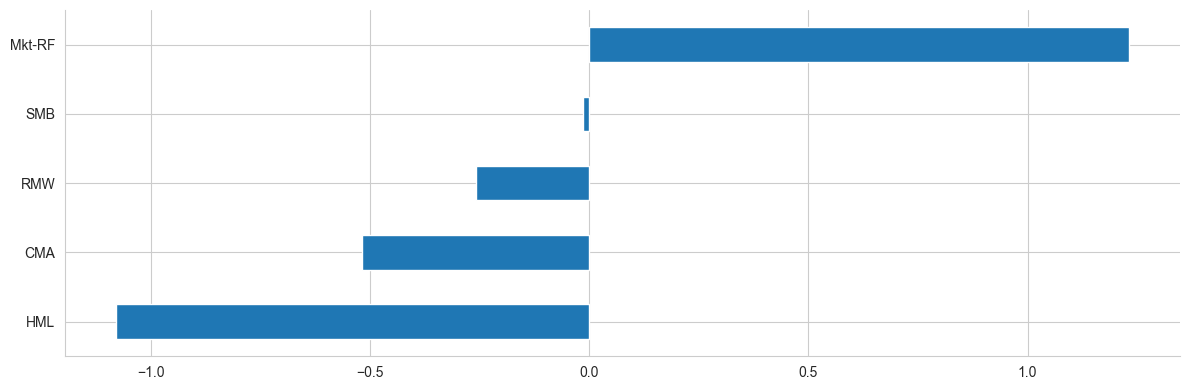

In [78]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout()